In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 **Importing Libraries**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ Dataset/Iris.csv', index_col=0)

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


from matplotlib import pyplot as plt
_df_0['SepalLengthCm'].plot(kind='hist', bins=20, title='SepalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['SepalWidthCm'].plot(kind='hist', bins=20, title='SepalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['PetalLengthCm'].plot(kind='hist', bins=20, title='PetalLengthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['PetalWidthCm'].plot(kind='hist', bins=20, title='PetalWidthCm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='SepalWidthCm', y='PetalLengthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['SepalLengthCm'].plot(kind='line', figsize=(8, 4), title='SepalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['SepalWidthCm'].plot(kind='line', figsize=(8, 4), title='SepalWidthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['PetalLengthCm'].plot(kind='line', figsize=(8, 4), title='PetalLengthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['PetalWidthCm'].plot(kind='line', figsize=(8, 4), title='PetalWidthCm')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)

<Axes: >

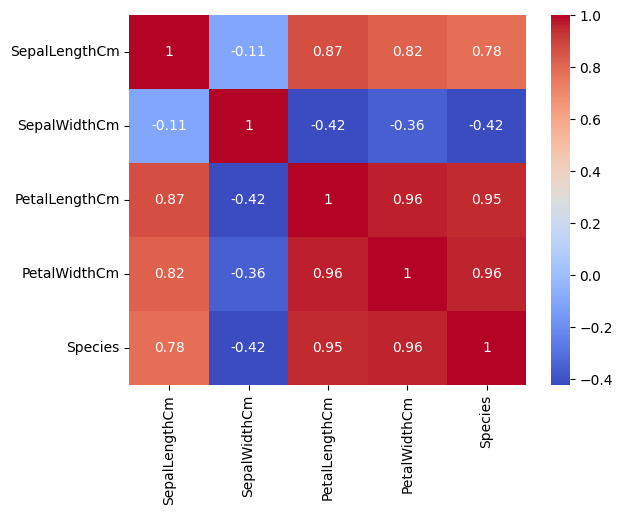

In [8]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

<Axes: xlabel='PetalWidthCm', ylabel='Species'>

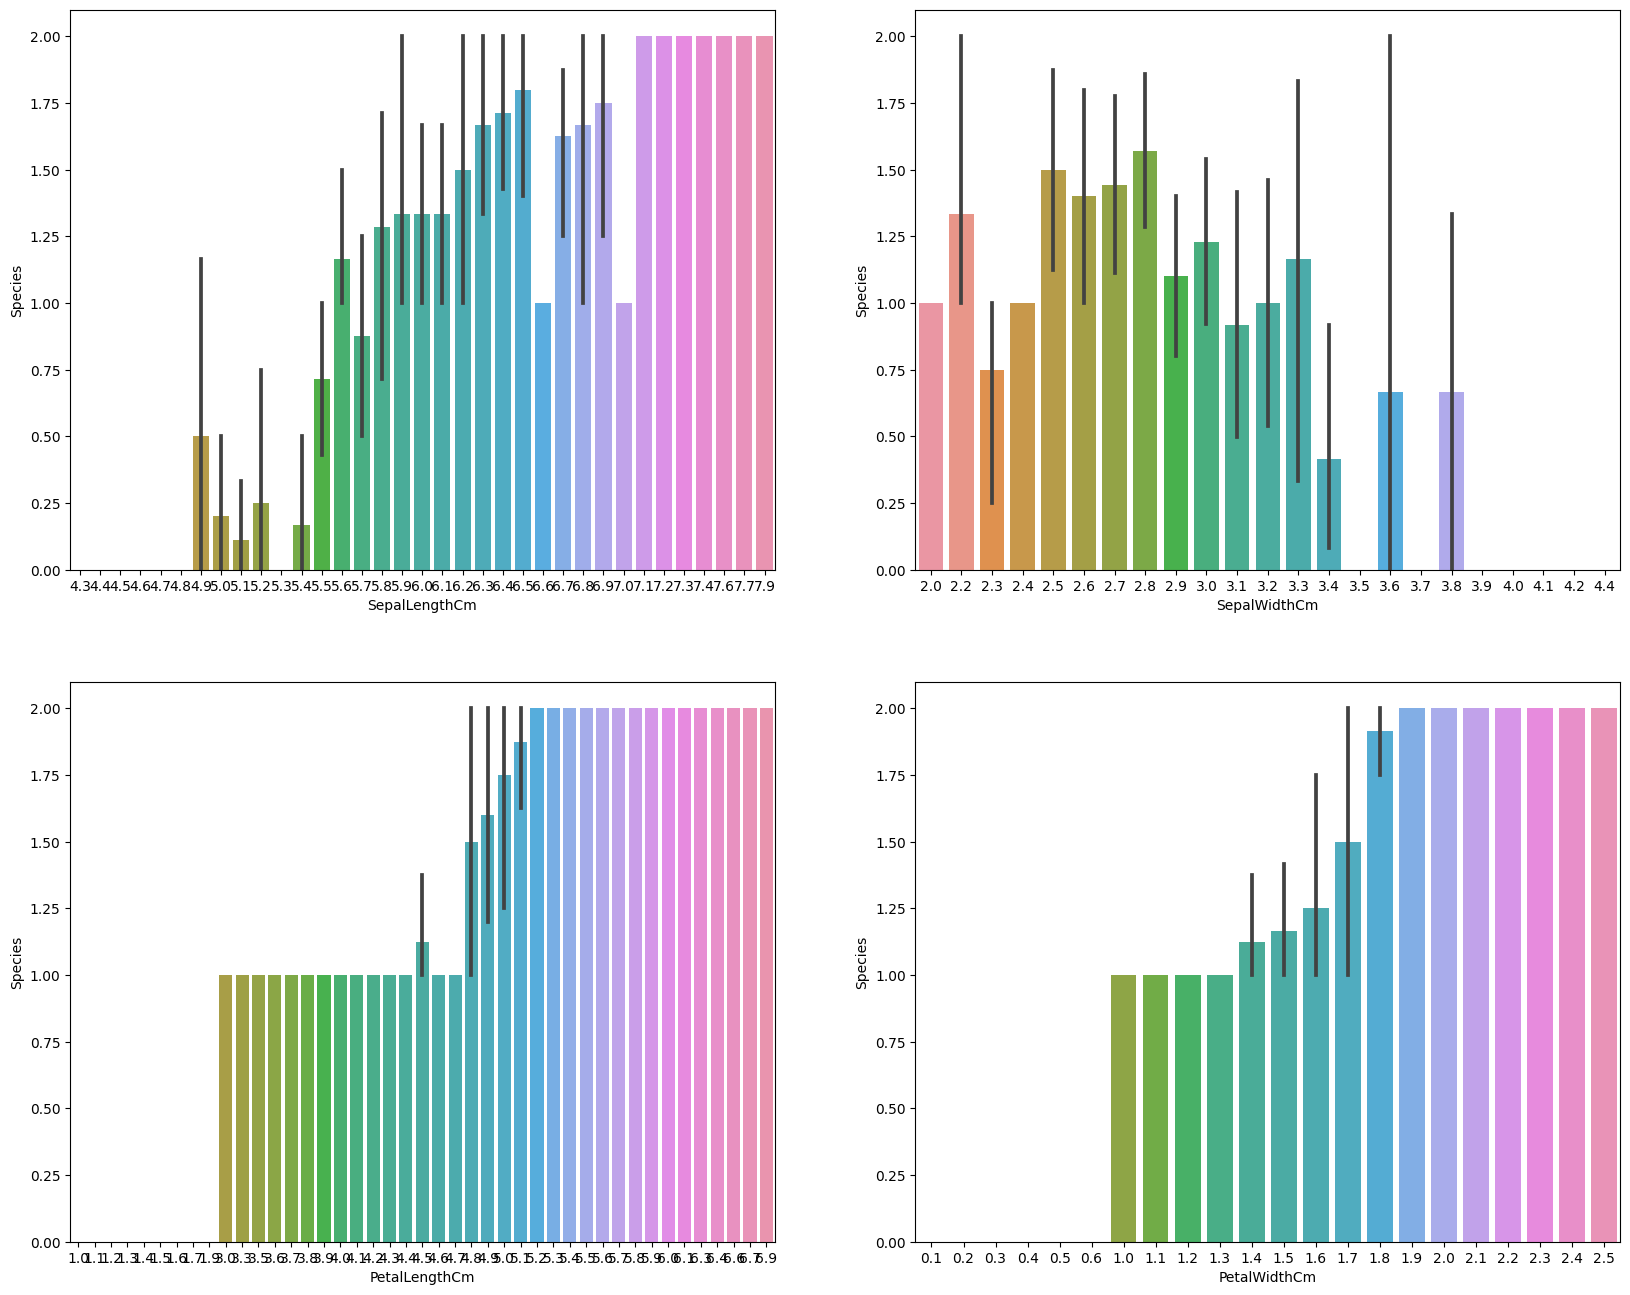

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
plt.subplot(221)
sns.barplot(data=df, x = 'SepalLengthCm', y = 'Species')

plt.subplot(222)
sns.barplot(data=df, x = 'SepalWidthCm', y = 'Species')

plt.subplot(223)
sns.barplot(data=df, x = 'PetalLengthCm', y = 'Species')

plt.subplot(224)
sns.barplot(data=df, x = 'PetalWidthCm', y = 'Species')

In [10]:
df.drop(['SepalWidthCm'], inplace=True, axis = 1)

In [11]:
X = df.drop(['Species'], axis = 1).values
y = df.Species.values

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y, train_size=.8, random_state=23)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((120, 3), (30, 3), (120,), (30,))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("model score ", model.score(X_train, y_train))
print("r2 score: ", r2_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

model score  0.9583333333333334
r2 score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

